In [1]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#print(X, ' data X\n')

# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0
pca = PCA(n_components=2) 
pca.fit(X) 
print(pca.explained_variance_ratio_, ' explained_variance_ratio_\n')

# Principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_.

print(pca.singular_values_, ' singular_values_')
# [6.30061... 0.54980...]

print('\n now with SVD solver')

pca = PCA(n_components=2, svd_solver='full')
pca.fit(X) 
print(pca.explained_variance_ratio_, ' explained_variance_ratio_\n')
print(pca.singular_values_)

print('\n lets try on Iris ', ' singular_values_')

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
pca = PCA(n_components=2)
pca.fit(X) 
print(pca.explained_variance_ratio_, ' explained_variance_ratio_\n')
print(pca.singular_values_, ' singular_values_')

# 4 components 
# [0.92461872 0.05306648 0.01710261 0.00521218]
# [25.09996044  6.01314738  3.41368064  1.88452351]

[0.99244289 0.00755711]  explained_variance_ratio_

[6.30061232 0.54980396]  singular_values_

 now with SVD solver
[0.99244289 0.00755711]
[6.30061232 0.54980396]

 lets try on Iris 
[0.92461872 0.05306648]
[25.09996044  6.01314738]


In [2]:
# 4 components 
iris = load_iris()
X = iris.data
pca = PCA(n_components=4)
pca.fit(X) 
print(pca.explained_variance_ratio_, ' explained_variance_ratio_\n')
print(pca.singular_values_, ' singular_values_')

[0.92461872 0.05306648 0.01710261 0.00521218]  explained_variance_ratio_

[25.09996044  6.01314738  3.41368064  1.88452351]  singular_values_


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mnist_data = pd.read_csv("datasets/mnist_train.csv")

# save the labes into a variable label
label = mnist_data['label']

# drop the label feature and store the pixel data in d
d = mnist_data.drop("label", axis=1)

# pick first 15k data-points to work on for time-effeciency
labels = label.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [4]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [5]:
# find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = (np.matmul(sample_data.T, sample_data))/15000
print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [6]:
# find the top two eigen-values and corresponding eigen-vectors for projecting onto a 2D space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen values in ascending order
# this code generates only top 2(782 and 783) eigenvalues

values, vectors = eigh(covar_matrix, eigvals=(782, 783))
print(values.shape)
print(values)
print("Shape of eigen vectors = ", vectors.shape)

# converting the eigen vectors into (2, d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)

# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

(2,)
[30.66109678 41.10062846]
Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [7]:
# projecting the original data sample on the plane formed by two principal eigen vectors by vector-vector multiplication
new_coordinates = np.matmul(vectors, sample_data.T)
print("resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape, " = ", new_coordinates.shape)

resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [8]:
# appending label to the 2D projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for plotting the labeled points
df = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
df.head()

,1st_principal,2nd_principal,label
0,-4.457050,0.960769,5.0
1,-7.397795,-8.658155,0.0
2,9.640690,-2.082854,4.0
3,-3.356074,7.187465,1.0
4,2.979880,4.933889,9.0


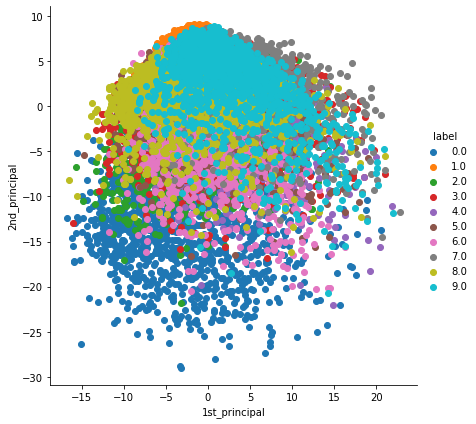

<Figure size 432x288 with 0 Axes>

In [10]:
# plotting the 2D data points with seaborn
import seaborn as sns
sns.FacetGrid(df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
plt.clf()

In [14]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


(15000, 3)


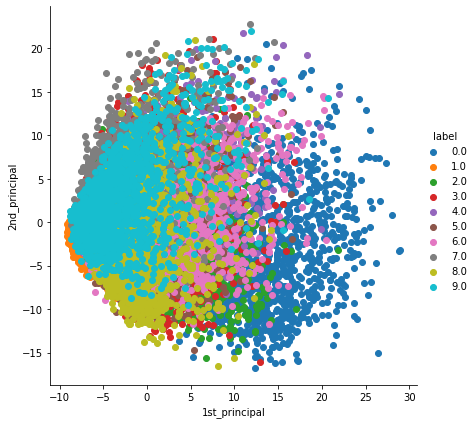

<Figure size 432x288 with 0 Axes>

In [15]:
# attaching the label for each 2D data point
pca_data = np.vstack((pca_data.T, labels)).T
print(pca_data.shape)

# creating a new data from which help plot the result data
pca_df = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(pca_df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
plt.clf()

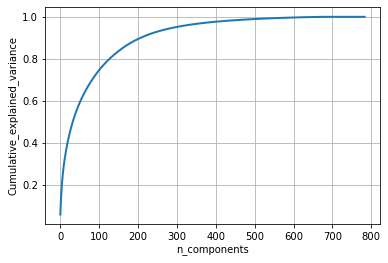

<Figure size 432x288 with 0 Axes>

In [17]:
# PCA for Dimensionality Reduction (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

# plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
plt.clf()

[[-2.68395875e+00  3.19844599e-01]
 [-2.71389486e+00 -1.80169778e-01]
 [-2.88905701e+00 -1.43604507e-01]
 [-2.74554908e+00 -3.16299556e-01]
 [-2.72872786e+00  3.29621283e-01]
 [-2.28078135e+00  7.45197891e-01]
 [-2.82091657e+00 -8.35401083e-02]
 [-2.62607475e+00  1.64161453e-01]
 [-2.88665288e+00 -5.76630139e-01]
 [-2.67258571e+00 -1.16033371e-01]
 [-2.50660043e+00  6.44622461e-01]
 [-2.61295986e+00  1.82549913e-02]
 [-2.78594958e+00 -2.37692712e-01]
 [-3.22409398e+00 -5.08893401e-01]
 [-2.64399790e+00  1.17611918e+00]
 [-2.38583857e+00  1.34368335e+00]
 [-2.62327707e+00  8.13245502e-01]
 [-2.64815855e+00  3.12920252e-01]
 [-2.19930340e+00  8.71240112e-01]
 [-2.58807838e+00  5.18580241e-01]
 [-2.30980881e+00  3.87926765e-01]
 [-2.54376360e+00  4.37431931e-01]
 [-3.21624166e+00  1.39879776e-01]
 [-2.30265720e+00  9.95879251e-02]
 [-2.35608807e+00 -3.27807167e-02]
 [-2.50639248e+00 -1.49746304e-01]
 [-2.46885043e+00  1.33300858e-01]
 [-2.56208030e+00  3.67279975e-01]
 [-2.63918964e+00  3

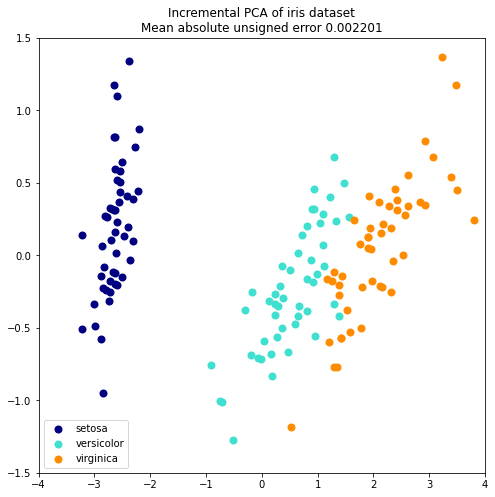

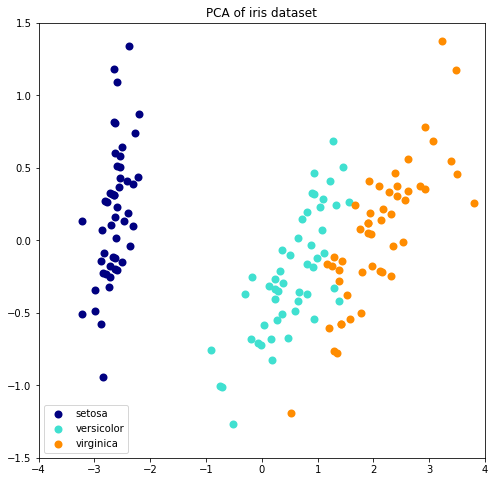

In [1]:
# Authors: Kyle Kastner
# License: BSD 3 clause

# Incremental PCA (IPCA) algorithms allow us to split the training set into mini-batches 
# and feed an IPCA algorithm one mini-batch at a time
# This is useful for large training sets and for applying PCA online (i.e., on the fly as new instances arrive)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print(X_ipca, ' X_ipca')

colors = ['navy', 'turquoise', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of iris dataset")
        
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [2]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

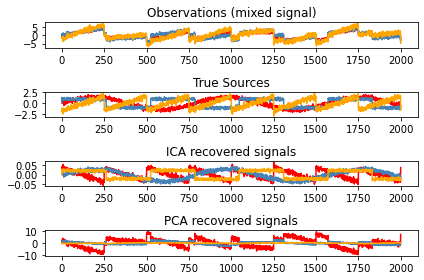

<Figure size 432x288 with 0 Axes>

In [3]:
# Independent Component Analysis (ICA)
# ICA is a method for separating a multivariate signal into additive subcomponents 
# by assuming that the subcomponents are non-Gaussian signals and that they are statistically independent from each other
# ICA is a special case of blind source separation
# common example of ICA application is the "cocktail party problem" of listening in on one person's speech in a noisy room

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################

# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()
plt.clf()